**<h1 align="center"><font color='black'>Analyzing US Vehicular Accidents and their Causes</font></h1>**
<h5 align="center"><font color='black'>Abhinav Garlipati, Ahmed Hamad, Edward Zhang, and Ved Chugh</font></h5>

***

**<h2 align="center"><font color='1874BD'>Introduction</font></h2>**

For the vast majority of Americans, personal vehicles constitute the entirety of their daily transport needs. Car ownership skyrocketed in the 1950s in response to rapid suburbanization, encouraging citizens to acquire reliable transportation. Now, a study by Forbes found that 91.7% of American households owned at least one vehicle, a steady increase since 2017. Across America, people take pride in their car's make, model, and modifications, making it one of the most critical US commercial industries. Personal vehicle ownership forms an integral part of our culture, so it's natural to wonder about the dangers of America's real national pastime— driving. 

When we first learn to drive, our mothers always tell us, "Don't drive in this storm!" In this document, we explore the merit in our parents' caution and highlight the factors contributing to increased driving dangers, including weather, time of day, and wind speed. With suburbanization only increasing across the United States, more citizens will own cars and find themselves forced to face the associated risks. Moreover, we account for the severity of each accident, adding a value to each factor. The addition of severity invites the question: have recent technological advancements really increased driver safety? Since 2015, vehicle traffic deaths have increased by 2.5% and rank as high as fifth for "years of life lost" in causes of death in the United States. Our data holds importance because of its potential to alter driving habits in ways that could save American lives. 

 
<font color='black'>To do this, we divide the Data Science process into its traditional five steps:<font><a class='anchor' id='top'></a>
- [Data Collection](#1)
- [Data Processing](#2)
- [Analysis & Visualization](#3)
- [Modeling](#4)
- [Interpretation](#5)

***

**<h2 align="center"><font color='1874BD'>Data Collection</font></h2>**

Dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

This self-explanatory part of the data collection process involved finding a suitable data set for our needs. The comma-separated value file linked above provided a comprehensive breadth of data regarding accident reports in the United States, including many vital factors that piqued our interest. We encourage users to access the database themselves. To do this, follow the link and scroll down to view a preliminary portion of the data. Pressing the download button in the top right stores the CSV file locally, which you may access on your own. 

To transform the data into a table suitable for Jupyter Notebook manipulation, we used the pandas read_csv function. Luckily, this provided a straightforward way to collect the data without meticulous manual intervention. 

We use pandas extensively throughout the document and further information on the tool can be found [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

In [91]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import TimestampedGeoJson

In [92]:
df = pd.read_csv("accidentData.csv")

In [93]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


***

**<h2 align="center"><font color='1874BD'>Data Processing</font></h2>**

In this section, we transform our collected data into a valuable table for visualization later. We want to limit the amount of data along with the given fields to focus on useful data corresponding to our desired focuses: severity, time, and weather metrics. 

Our previous data collection method left us with 2.8 million observations... way too many to process efficiently or in a timely manner. The processing time becomes a huge factor when trying to visualize data during plotting. 

In response, we drop any entries with "na" columns, meaning those with missing data points. Doing this provides better, more robust data while alleviating the processing issue. 

In [94]:
df = df.dropna()
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
42,A-43,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,Closed between IN-26 and IN-67 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
43,A-44,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,Closed between IN-67 and IN-26 - Road closed d...,...,False,False,False,False,False,False,Night,Day,Day,Day
47,A-48,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,Closed between Willshire and US-33/Rockford Rd...,...,False,False,False,False,False,False,Night,Night,Night,Day
50,A-51,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,Between Irish Rd and Blystone Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
66,A-67,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,At I-490/Exit 161 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845298,A-2845299,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,At Fassler Ave/Rockaway Beach Ave - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845302,A-2845303,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,Closed between Yuba City and CA-99/Sawtelle Av...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845303,A-2845304,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,Closed between CA-99/Sawtelle Ave and Yuba Cit...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845304,A-2845305,3,2019-08-23 01:16:01,2019-08-23 01:44:53,34.121320,-117.254540,34.121320,-117.254540,0.000,At San Bernardino - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


However, performing this step still leaves us with nearly one million observations, which is too large to allow prompt analysis. Therefore, managing the data further is necessary. We do this by identifying a potential constraining field, year, and picking the most entries. This limitation allows us to use manageable data while retaining a comprehensive collection of relevant data. 

In the graph below, collect the number of entries in each year and isolate 2021 as our year of choice because it contains the most data. 

In [95]:
count = {}
for x in range(943318):
    count[df.iat[x,2][0:4]] = count.get(df.iat[x,2][0:4],0)+1
count

{'2016': 693,
 '2017': 1590,
 '2021': 669531,
 '2020': 219585,
 '2019': 49694,
 '2018': 2225}

Text(0.5, 1.0, 'No. of Accidents per Year')

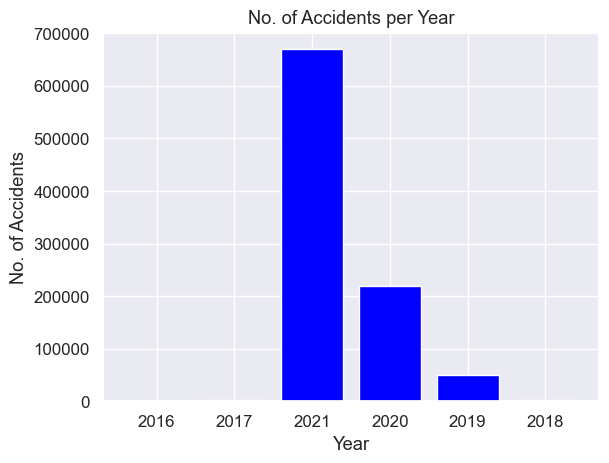

In [96]:
plt.bar(list(count.keys()),list(count.values()), color  = "blue")
plt.xlabel("Year")
plt.ylabel("No. of Accidents")
plt.title("No. of Accidents per Year")

In [97]:
toBeRemoved = []
for x in range(943318):
    if df.iat[x,2][0:4] != "2020":
        toBeRemoved.append(df.index[x])
df = df.drop(toBeRemoved)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
246924,A-246925,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,44.734005,-122.166744,1.107,Hazardous tree or vegetation is causing no to ...,...,False,False,False,False,False,False,Night,Night,Day,Day
250560,A-250561,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.704907,-122.231897,44.697982,-122.217820,0.841,A crash has occurred causing no to minimum del...,...,False,False,False,False,False,False,Night,Night,Day,Day
297791,A-297792,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.754713,-122.398451,44.756005,-122.391252,0.364,Rock fall has occurred causing no to minimum d...,...,False,False,False,False,False,False,Night,Night,Day,Day
312250,A-312251,2,2020-10-13 19:19:34,2021-10-01 08:00:00,44.701126,-122.074713,44.699826,-122.070964,0.205,A crash has occurred use caution.,...,False,False,False,False,False,False,Night,Night,Day,Day
320955,A-320956,2,2020-10-13 19:19:34.000000000,2021-07-19 08:00:00.000000000,44.725203,-122.185579,44.728013,-122.180288,0.324,Incident on OR-22 EB near MP 48 Drive with cau...,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362639,A-2362640,2,2020-01-06 19:11:00,2020-01-06 20:26:36,35.364949,-118.967601,35.364949,-118.967601,0.000,At CA-58/Bakersfield Tehachapi Hwy - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2362640,A-2362641,2,2020-01-06 19:22:00,2020-01-06 19:53:38,33.775337,-117.992681,33.775337,-117.992681,0.000,At Lampson Ave - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2362643,A-2362644,2,2020-01-06 19:24:00,2020-01-06 20:00:38,34.139057,-118.362045,34.139057,-118.362045,0.000,At Cahuenga Blvd - Accident.,...,False,True,False,False,True,False,Night,Night,Night,Night
2362655,A-2362656,2,2020-01-06 20:49:00,2020-01-06 21:22:38,33.929463,-118.254268,33.929463,-118.254268,0.000,At Central Ave - Accident.,...,False,False,False,False,True,False,Night,Night,Night,Night


Now that we have sufficiently trimmed the number of rows, we may start isolating the desired incidents. As previously mentioned, we have a considerable interest in severity, time, and weather factors. Over the next few cells, we will identify extraneous columns and trim them accordingly.

In [98]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<h5 align="center"><font color='red'>And the Purge Begins!!!</font></h5>

We have little interest in traffic impact, so we are ok axing End_Time, End_Lat, End_Lng, and Distance. 

We do not require the location now, so leaving Number, Street, Side, City, County, Zipcode, Timezone, and Airport_Code behind works for our purposes. 

Additionally, every country entry says "USA" so this column also is redundant. 

Now, let's delete the unnecessary weather columns: Weather_TimeStamp, Wind_Direction, Humidty(%), and Pressure(in) along with Civil_Twilight, Nautical_Twilight, and Astronomical_Twilight since these do not concern us. 

Finally, these operations leave us with a concise table ready for visualization. 

In [99]:
df = df.drop(['End_Time', 'End_Lat', 'End_Lng','Distance(mi)', 'Number', 'Street',
       'Side', 'City', 'County','Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Wind_Direction','Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight','Humidity(%)', 'Pressure(in)'], axis=1)

df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,State,Temperature(F),Wind_Chill(F),Visibility(mi),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
246924,A-246925,2,2020-10-13 19:19:34.000000000,44.725203,-122.185579,Hazardous tree or vegetation is causing no to ...,OR,60.0,60.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
250560,A-250561,2,2020-10-13 19:19:34,44.704907,-122.231897,A crash has occurred causing no to minimum del...,OR,60.0,60.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
297791,A-297792,2,2020-10-13 19:19:34,44.754713,-122.398451,Rock fall has occurred causing no to minimum d...,OR,60.0,60.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
312250,A-312251,2,2020-10-13 19:19:34,44.701126,-122.074713,A crash has occurred use caution.,OR,60.0,60.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
320955,A-320956,2,2020-10-13 19:19:34.000000000,44.725203,-122.185579,Incident on OR-22 EB near MP 48 Drive with cau...,OR,60.0,60.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362639,A-2362640,2,2020-01-06 19:11:00,35.364949,-118.967601,At CA-58/Bakersfield Tehachapi Hwy - Accident.,CA,43.0,43.0,5.0,...,False,False,False,False,False,False,False,False,False,Night
2362640,A-2362641,2,2020-01-06 19:22:00,33.775337,-117.992681,At Lampson Ave - Accident.,CA,67.0,67.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
2362643,A-2362644,2,2020-01-06 19:24:00,34.139057,-118.362045,At Cahuenga Blvd - Accident.,CA,60.0,60.0,10.0,...,False,False,True,False,True,False,False,True,False,Night
2362655,A-2362656,2,2020-01-06 20:49:00,33.929463,-118.254268,At Central Ave - Accident.,CA,62.0,62.0,10.0,...,False,False,False,False,False,False,False,True,False,Night


***

**<h2 align="center"><font color='1874BD'>Analysis and Visualization</font></h2>**

This section revolves around understanding the data using graphical analysis. Additionally, it attempts to perform a brief statistical analysis that we explore further in the interpretation section. 

We start by comparing accident severity before we move to weather factors. Each of these plots provides insight into our essential questions regarding the safety of drivers on US roads. 


Text(0.5, 1.0, 'No. of Accidents per Severity')

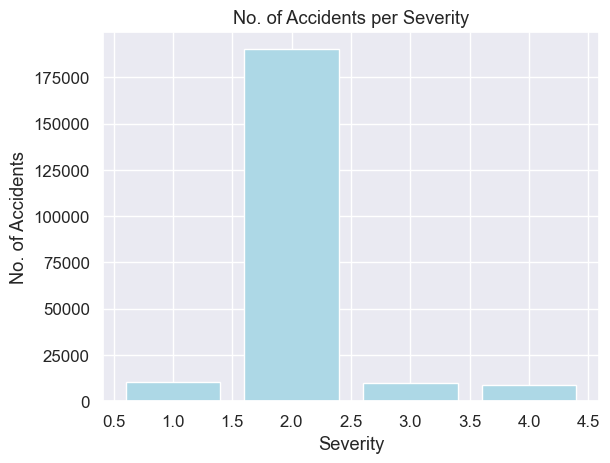

In [100]:
count = {}
for x in range(219585):
    count[df.iat[x,1]] = count.get(df.iat[x,1],0)+1
plt.bar(list(count.keys()),list(count.values()), 
        color  = "#ADD8E6")
plt.xlabel("Severity")
plt.ylabel("No. of Accidents")
plt.title("No. of Accidents per Severity")

Our database scales accident severity from 1-4, increasing based on its traffic impact. Here, we assume that greater severity also correlates to more significant injury to drivers. Based on the graph, most incidents have relatively mild danger, but we want to identify the weather factors that may impact this data and the potential risks. 


Starting with Temperature's Effect on Accident Severity:

Text(0.5, 1.0, 'Temperature(F) vs Accident Serverity:')

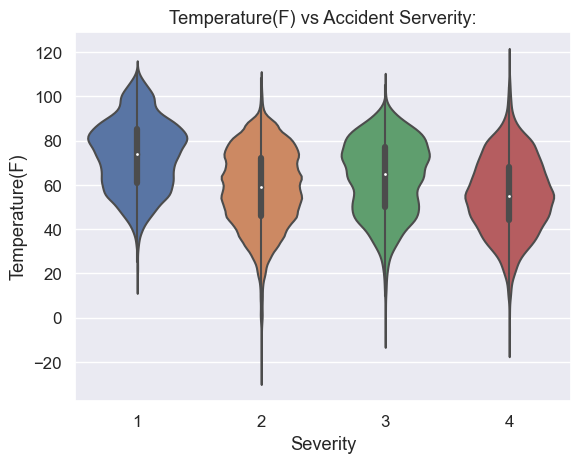

In [101]:
sns.violinplot(x ="Severity", y = "Temperature(F)", data = df)
plt.title("Temperature(F) vs Accident Serverity:")

Initially, it appears as though temperature varies extensively in regards to severity. Therefore, temperature may not aptly account for an increase in driving risks. 

Visibility vs Accident Serverity:

Text(0.5, 1.0, 'Visibility(mi) vs Accident Severity:')

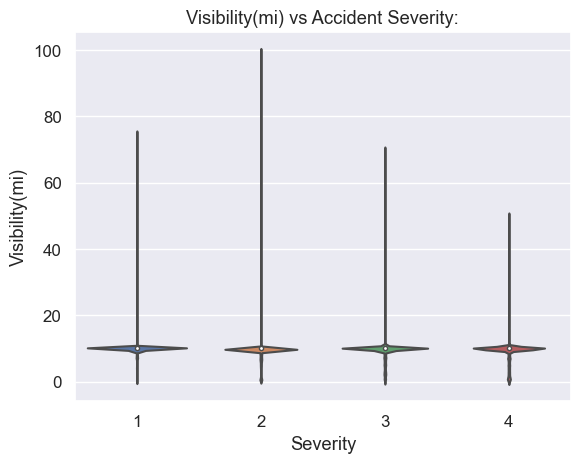

In [102]:
sns.violinplot(x ="Severity", y = "Visibility(mi)", data = df)
plt.title("Visibility(mi) vs Accident Severity:")

Here, the data has outliers, but it also focuses the bulk of the incidents below the 20-mile visibility threshold. It appears visibility may be a much better risk marker, which makes sense. We want to focus on this minimal range, so let's probe a little deeper into the below 20 range. First, we remove outliers, classified as anything greater than 4 standard deviations away from the mean.

Text(0.5, 1.0, 'Visibility(mi) vs Accident Severity:')

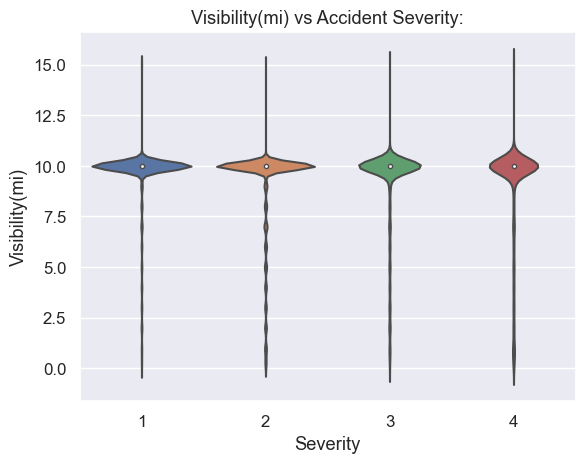

In [103]:
mean_vis = df['Visibility(mi)'].mean()
std_vis = df['Visibility(mi)'].std()

clean_vis = df[(df['Visibility(mi)'] <= mean_vis + (4*std_vis))]
clean_vis = clean_vis[(clean_vis['Visibility(mi)'] >= mean_vis - (4 * std_vis))]

sns.violinplot(x ="Severity", y = "Visibility(mi)", data = clean_vis)
plt.title("Visibility(mi) vs Accident Severity:")

(0.0, 20.0)

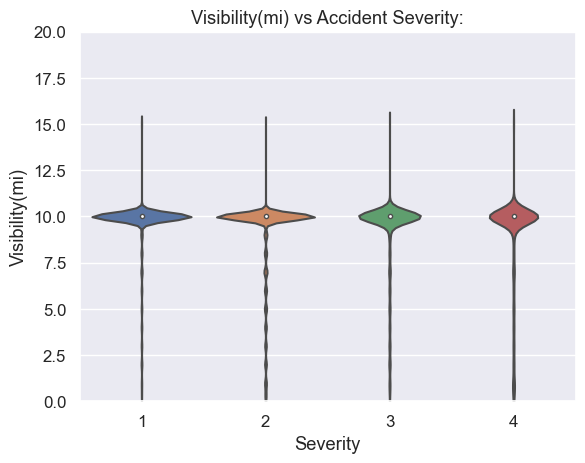

In [104]:
sns.violinplot(x ="Severity", y = "Visibility(mi)", data = clean_vis)
plt.title("Visibility(mi) vs Accident Severity:")
plt.ylim(0, 20)

Interestingly, the data remains very compact. Low visibility obviously inhibits driving ability, but why does the graph reflect high variation? Very low visibility highly impacts severity; however, these conditions are much rarer than that 10-mile sweet spot. 

Now let's check out Wind Speed vs. Severity:

Text(0.5, 1.0, 'Wind_Speed(mph) vs Accident Serverity:')

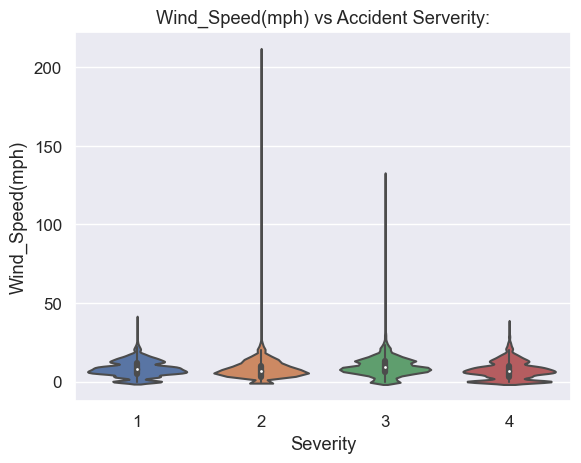

In [105]:
sns.violinplot(x ="Severity", y = "Wind_Speed(mph)", data = df)
plt.title("Wind_Speed(mph) vs Accident Serverity:")

Once again, the data centers below a certain threshold, this time the 50mph mark, so we isolate the chart to that range and perform the same outlier-removing processes. 

(0.0, 50.0)

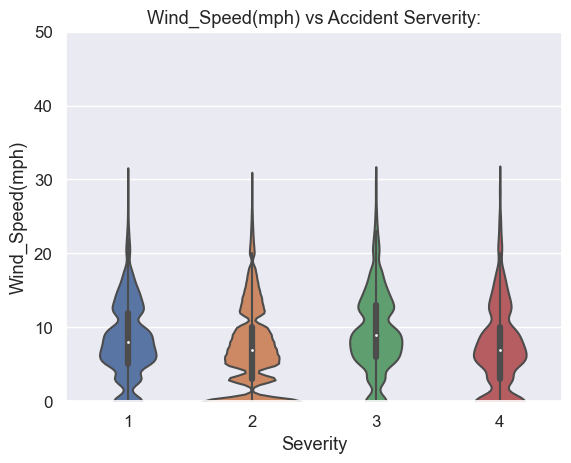

In [106]:
mean_wind = df['Wind_Speed(mph)'].mean()
std_wind = df['Wind_Speed(mph)'].std()

clean_wind = df[(df['Wind_Speed(mph)'] <= mean_wind + (4*std_wind))]
clean_wind = clean_wind[(clean_wind['Wind_Speed(mph)'] >= mean_wind - (4 * std_wind))]

sns.violinplot(x ="Severity", y = "Wind_Speed(mph)", data = clean_wind)
plt.title("Wind_Speed(mph) vs Accident Serverity:")
plt.ylim(0, 50)

Wind speed may not have a high correlation with severity. 

Now let's switch to the overall weather condition (i.e., cloudy, clear, etc.) Since these have non-numerical fields, we first isolate the data by weather conditions, checking the sheer number of respective accidents. 

[Text(0.5, 0, 'Weather Condition'), Text(0, 0.5, 'Number of Accidents')]

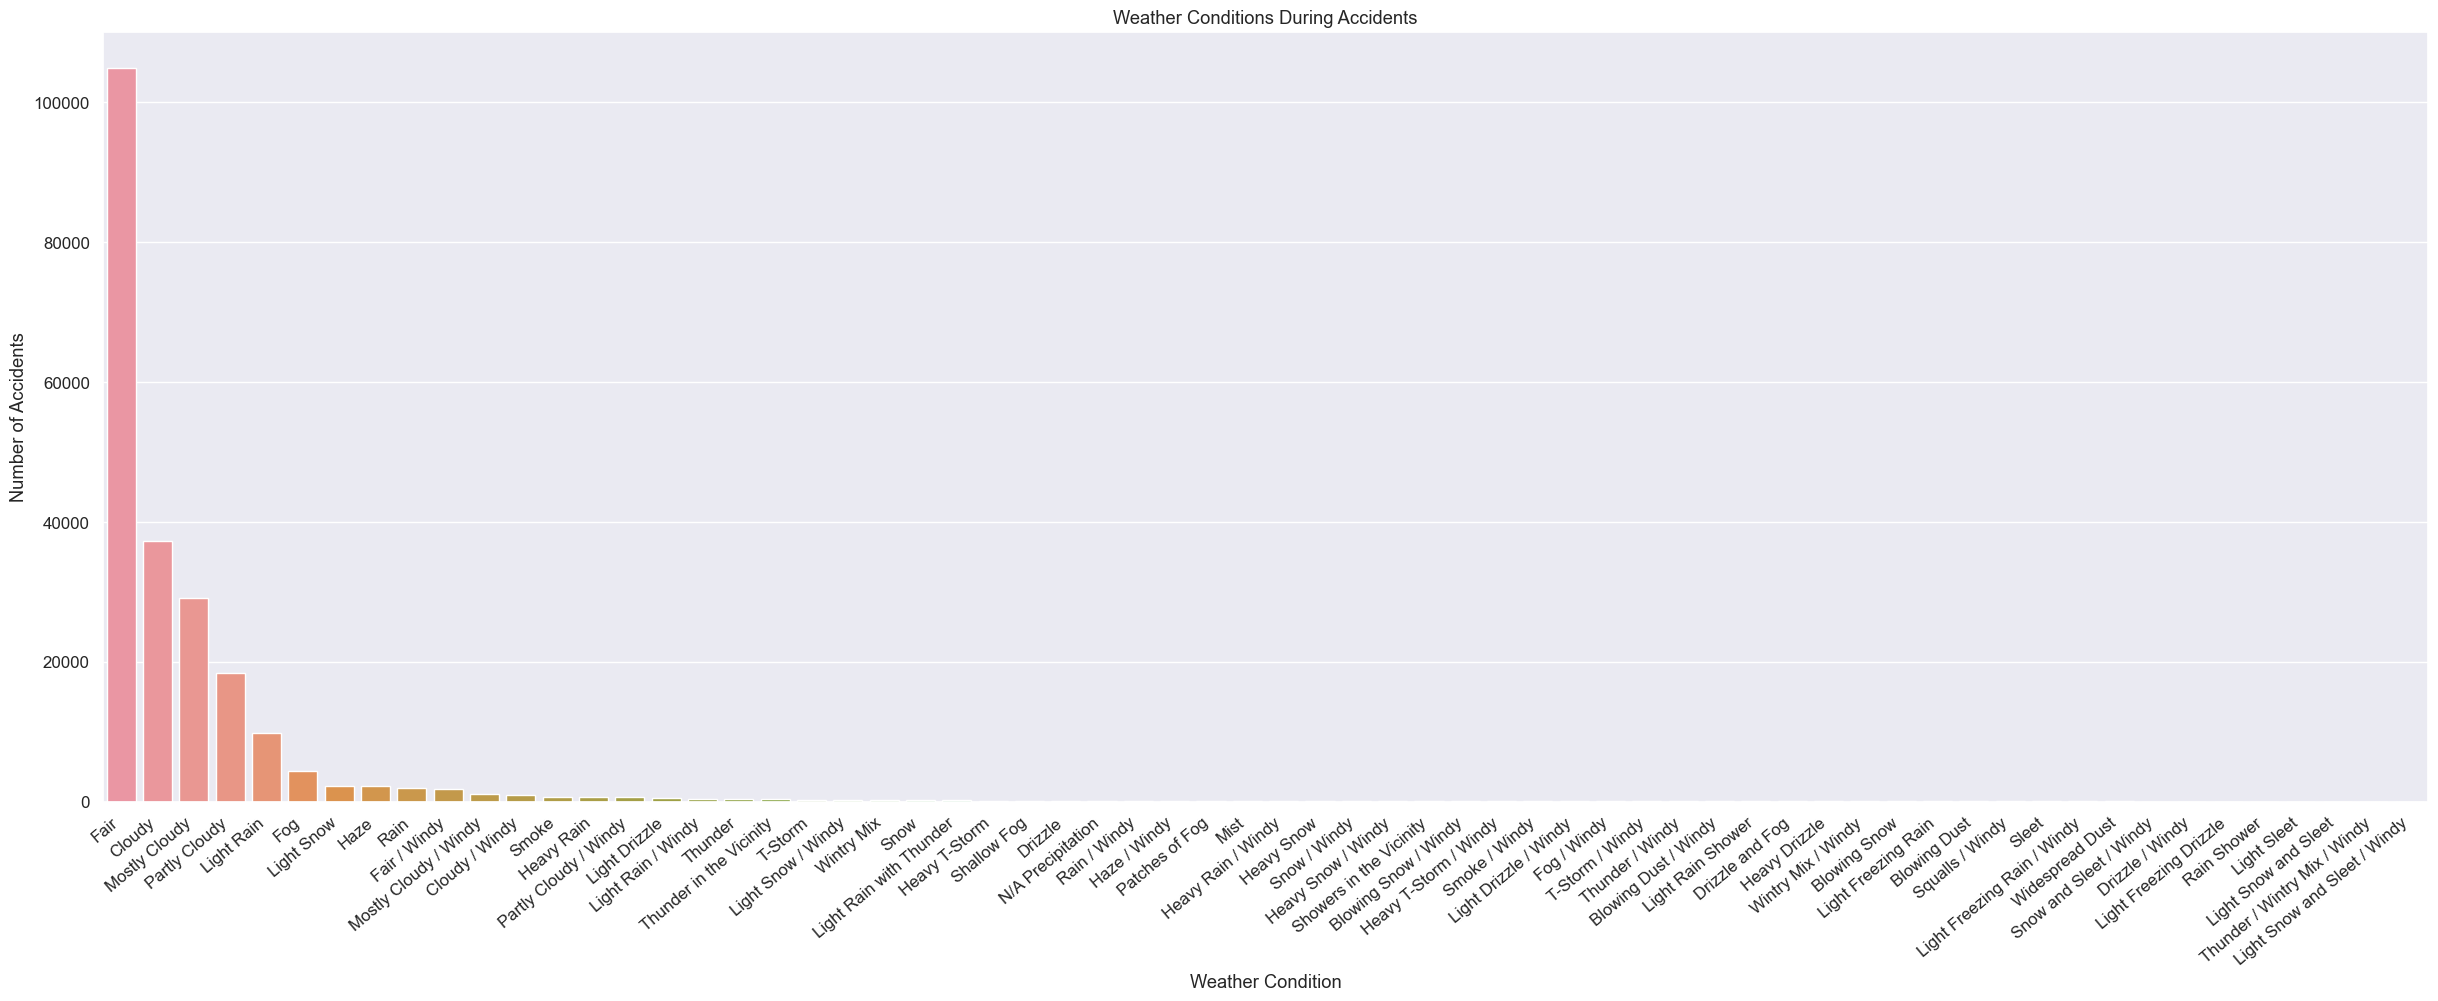

In [107]:
plt.figure(figsize = (30, 10))
sns.set(font_scale = 1.1)
accidentplot = sns.countplot(data= df, x= 'Weather_Condition', 
                             order= df['Weather_Condition'].value_counts().index)
accidentplot.set_xticklabels(accidentplot.get_xticklabels(), rotation=40, ha="right")
accidentplot.set_title('Weather Conditions During Accidents')
accidentplot.set(xlabel= 'Weather Condition', ylabel= 'Number of Accidents')

Instead of trying to make sense of the cluttered x-axis, we noticed the majority of incidents grouped between just a few weather conditions. In response, we isolated these specific weather conditions, naming the six states with the highest number of accidents. Furthermore, we acknowledge that these are a few of the most common overall weather conditions. This occurs because if a person drives every day, they will be more likely to encounter similar weather conditions over and over again. 

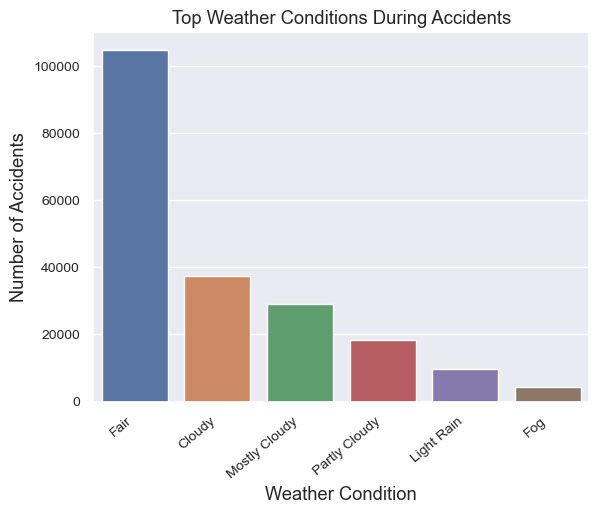

In [108]:
count = {}
for x in range(219585):
    count[df.iat[x,12]] = count.get(df.iat[x,12],0)+1
# Copied directly from count variable, showing largest categories
updatedCount = {"Cloudy":37293, "Fair":104828, "Partly Cloudy":18402, 
                "Fog":4321, "Light Rain":9825, "Mostly Cloudy":29139}

topsix = pd.DataFrame(list(updatedCount.items()), columns=['Weather', 'Count'])
topsix = topsix.sort_values('Count', ascending=False)
six_bar = sns.barplot(x= 'Weather', y= 'Count', data= topsix)
six_bar.set_xticklabels(six_bar.get_xticklabels(), rotation=40, ha="right")
six_bar.set_title("Top Weather Conditions During Accidents")
six_bar.set(xlabel= 'Weather Condition', ylabel= "Number of Accidents")
six_bar.tick_params(axis='both', which='major', labelsize=10)


As we can see inclement weather does not have too big of an impact on the cause of accidents

Lets see if the time of day has a big impact on accidents

Text(0.5, 1.0, 'No. of Accidents per Time of Day')

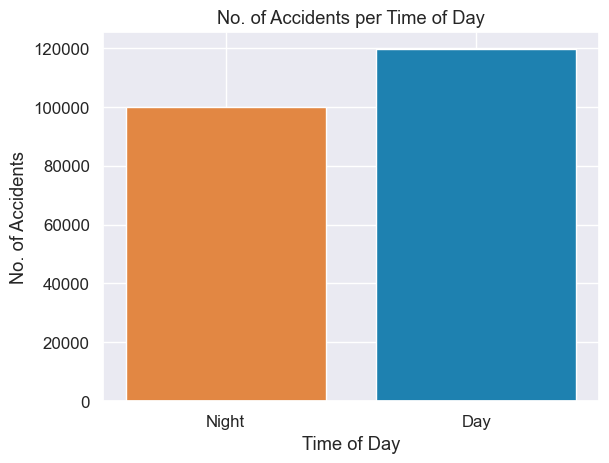

In [109]:
count = {}
for x in range(219585):
    count[df.iat[x,26]] = count.get(df.iat[x,26],0)+1
plt.bar(list(count.keys()),list(count.values()), color  = ['#e28743', "#1e81b0"])
plt.xlabel("Time of Day")
plt.ylabel("No. of Accidents")
plt.title("No. of Accidents per Time of Day")

Interestingly, the number of accidents stays relatively consistent based on the time of day. This fact felt counterintuitive to our beliefs, considering that visibility should decrease at night and people should be more tired, so we decided to delve further. Maybe accidents do not correspond to the general setting, but rather the specific hour. 

In [111]:
df["Start_Time"] =  pd.to_datetime(df["Start_Time"])

Text(0, 0.5, 'No. of Accidents')

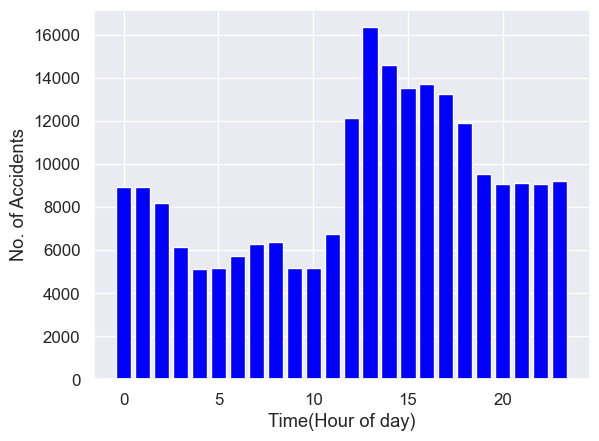

In [112]:
count = {}
for x in range(219585):
    count[df.iat[x,2].hour] = count.get(df.iat[x,2].hour,0)+1
plt.bar(list(count.keys()),list(count.values()), color  = "blue")
plt.xlabel("Time(Hour of day)")
plt.ylabel("No. of Accidents")


It seems that the most accidents occur between Noon and around 2 am. this is most likely due to people commuting to and from work and possibly drunk drivers?? driving back home after a night out

Lastly lets visualize where the most accidents in this data set are occuring

In [113]:
# accident_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4.45, tiles='Stamen Terrain', prefer_canvas = True,zoom_control=False,
#                scrollWheelZoom=False, dragging=False)
# #Used to set color of severity of accident on map
# def color_manager(severity):
#     if severity  == 1:
#         return 'lightgreen'
#     if severity == 2:
#         return 'yellow'
#     if severity == 3:
#         return 'orange'
#     else:
#         return 'red'
        
# for x in range(219585):
#     folium.CircleMarker(
#         location=[df.iat[x,3],df.iat[x,4]],
#         radius=2,
#         fill = True,
#         fill_opacity = 0.3, # Setting the inner circle opacity
#         color = color_manager(df.iat[x,1]),
#         opacity = 0.4,
#         bubling_mouse_events = True,
#         popup= [df.iat[x,5]] # Setting up an info pop up with Event type as it's info
#     ).add_to(accident_map)
# accident_map

As we can see a large number of the accidents occur on the west and east coast with the more severe accidents occuring on the east coast. The mid west has a decent amount of accidents however they are very dispersed and not concentrated unlike the coasts

***

**<h2 align="center"><font color='1874BD'>Machine Learning Model</font></h2>**

***

**<h2 align="center"><font color='1874BD'>Interpretation</font></h2>**